In [1]:
# Required imports
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mavenn_visualisation_modules import *
from utils import *
from config import *


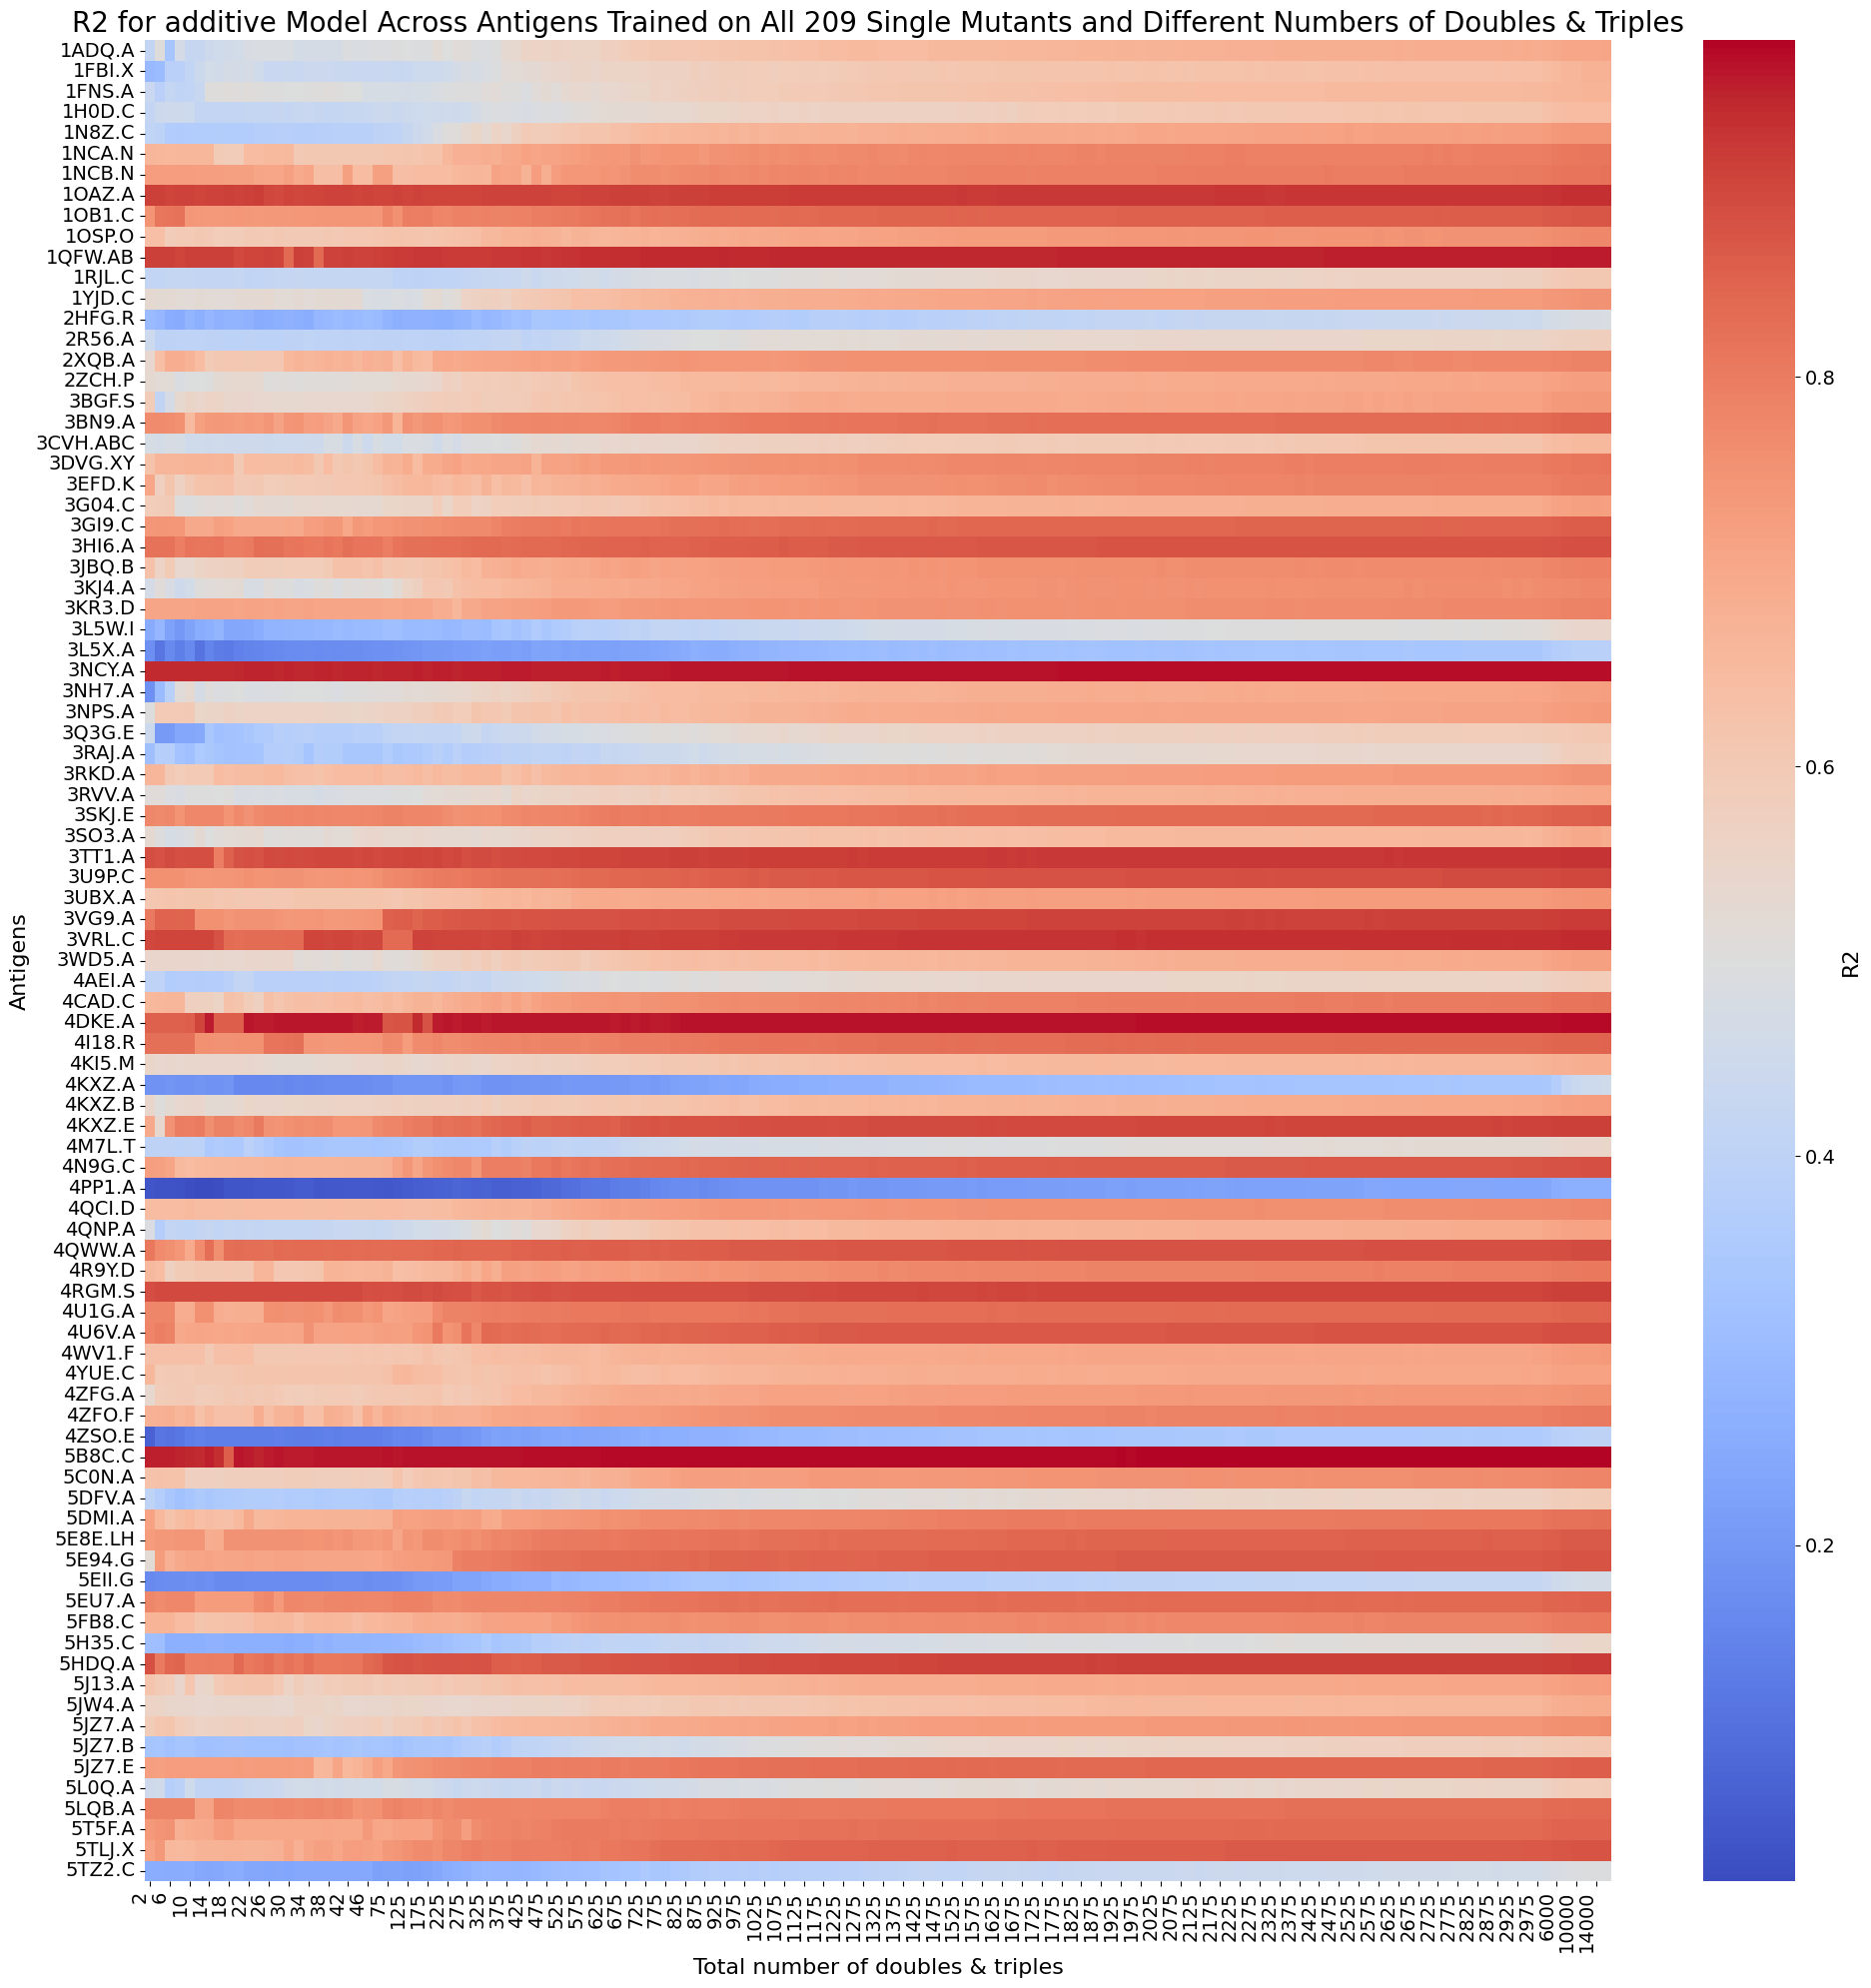

Plot saved to /Users/uw20204/Desktop/tidy/Roche_work/global_epistasis/figs/epitope_vs_r2_plot.png


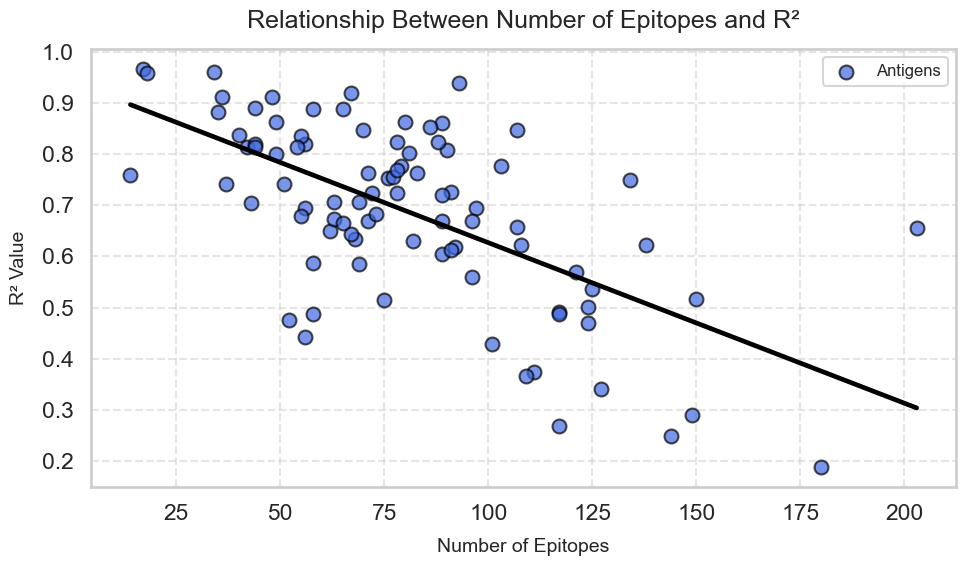

In [2]:
# Load seed data
results_list, file_names = load_results(SEED_DATA_DIR, "*0.5_0.01_seed_random_downsampling_results*")
names = extract_antigen_names(file_names)

# Plot single antigen heatmap
FBI_X = pd.read_csv(f"{SEED_DATA_DIR}/1FBI_X_LYYYGTSYGVL_all_mutants_0.5_0.01_seed_random_downsampling_results.tsv", 
                    sep="\t").dropna().reset_index(drop=True)

# Plot all datasets heatmap
plot_heatmap_of_spearman(results_list, names, out_dir=FIGS_DIR, gpmap="additive")

# Calculate R² at sample size
r2_1000 = calculate_r2_at_sample_size(names, results_list, SAMPLE_SIZE)

# Get unique epitope counts
dataset_num_epitopes = get_epitope_counts(BINDINGS_DIR, "*Final*")

# Combine into a single DataFrame
num_epitopes_vs_r2 = pd.DataFrame(dataset_num_epitopes).merge(
    pd.DataFrame(r2_1000), how="outer", on=0
)
num_epitopes_vs_r2.columns = ['Antigen', 'num_epitopes', 'r2']

# Plot epitope vs R²
plot_num_epitopes_vs_r2(num_epitopes_vs_r2, output_path=os.path.join(FIGS_DIR, "epitope_vs_r2_plot.png"))


/Users/uw20204/Desktop/tidy/Roche_work/global_epistasis/scripts/mavenn_visualisation_modules.py:812: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Plot saved to /Users/uw20204/Desktop/tidy/Roche_work/global_epistasis/figs/max_spearman_additive.png


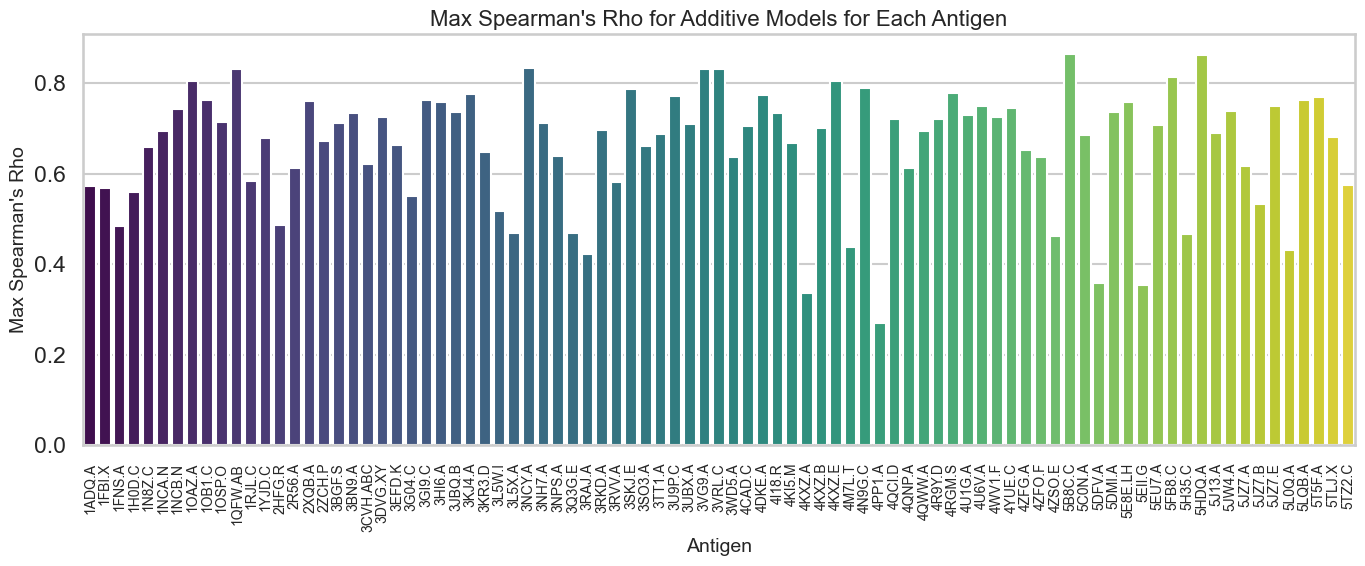

In [3]:
# Process the first set of files
df = process_double_triple_files(
    data_dir=f"{DIR}/data/seed", 
    file_pattern="*0.5_0.01_seed_sampling_results_double_triple_final*", 
    output_path=os.path.join(FIGS_DIR, "max_spearman_additive_1.png")
)

# Plot max Spearman for additive models
plot_max_spearman_additive(df, output_path=os.path.join(FIGS_DIR, "max_spearman_additive.png"), palette="viridis")


In [ ]:
# Generate and save latent phenotype and prediction plots as a panel.
generate_panel_of_plots(
    data_dir=LATENT_PHENOTYPE_PLOT_DATA, 
    output_path=OUTPUT_PATH,
    gpmap = "additive",
    colour_palette =colour_palette
)

generate_comparison_panels(
    data_dir=LATENT_PHENOTYPE_PLOT_DATA, 
    output_path=OUTPUT_PATH,
    gpmap_types=["additive", "neighbor", "pairwise", "blackbox"],
    max_plots=5
)
